## SARiSC Laboratorium

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
from typing import List
from sklearn import svm
from sklearn.metrics import accuracy_score

    RRI (RR interval): Jest to odstęp czasu między kolejnymi skurczami serca, mierzony w milisekundach (ms). RRI jest miarą zmienności rytmu serca, która może być przydatna do oceny regulacji autonomicznej.

    RR-systolic: Odnosi się do ciśnienia skurczowego krwi, czyli najwyższego ciśnienia krwi w naczyniach krwionośnych, wyrażonego w milimetrach słupa rtęci (mmHg), które towarzyszy skurczowi serca.

    RR-diastolic: Odnosi się do ciśnienia rozkurczowego krwi, czyli najniższego ciśnienia krwi w naczyniach krwionośnych, wyrażonego w milimetrach słupa rtęci (mmHg), które występuje podczas rozkurczu serca.

    RR-mean: Odnosi się do ciśnienia średniego krwi, czyli średniego ciśnienia krwi w naczyniach krwionośnych w okresie cyklu sercowego, wyrażonego w milimetrach słupa rtęci (mmHg).

    IBI (Interbeat Interval): Jest to również odstęp czasu między kolejnymi skurczami serca, mierzony w milisekundach (ms). IBI jest również miarą zmienności rytmu serca i jest równoważne RRI.

In [22]:
class ColNames:
    time_ms = 'time[min]'
    rri_ms = 'rri[ms]'
    rr_systolic_mmHg = 'rr-systolic[mmHg]'
    rr_diastolic_mmHg = 'rr-diastolic[mmHg]'
    rr_mean_mmHg = 'rr-mean[mmHg]'
    ibi_ms = 'ibi[ms]'
    file_name = 'file name'
    sex = 'SEX [nominal codes: "1" woman; "2" man]'


class MyData:
    def __init__(self, target, value):
        self.target = target
        self.value = value

    def ValueToVector(self):
        if isinstance(self.value, pd.DataFrame):
            self.value  = self.value.to_numpy().ravel()


In [11]:
def limit_row(df_dict, limit):
    """
    Funkcja ograniczająca liczbę wierszy w każdym DataFrame w słowniku do określonej liczby.

    Parametry:
    - df_dict (dict): Słownik zawierający DataFrame'y.
    - limit (int): Maksymalna liczba wierszy, do której należy ograniczyć każdy DataFrame.

    Zwraca:
    - dict: Zaktualizowany słownik zawierający DataFrame'y z ograniczoną liczbą wierszy.
    """
    df_dict_res = {}
    for key in df_dict:
        df_temp = df_dict[key]
        df_dict_res[key] = df_temp.head(limit)

    return df_dict_res

def merge_v1(df_dict, df_labels, target):
    df_res = {}
    for key in df_dict:
        df_res[key] = MyData(df_labels.loc[df_labels[ColNames.file_name] == key].iloc[0][target], df_dict[key])
    return df_res


In [3]:
folder_path = 'HYPOL RECORDINGS/'

# Inicjalizacja pustego słownika
ekg_dict = {}

# Iteracja przez pliki w folderze
for filename in os.listdir(folder_path):
    # Sprawdzenie, czy plik ma rozszerzenie .rea (załóżmy, że wszystkie pliki EKG mają to rozszerzenie)
    if filename.endswith('.rea'):
        # Pełna ścieżka do pliku
        file_path = os.path.join(folder_path, filename)
        
        # Wczytanie pliku do DataFrame
        df_temp = pd.read_csv(file_path, delimiter='\t', header=0)
        
        # Dodanie do słownika, gdzie kluczem jest nazwa pliku, a wartością DataFrame
        ekg_dict[filename] = df_temp

In [12]:
df_main = pd.read_excel('HYPOL clinical characteristics.xls')

print(df_main.head())

   file name  SEX [nominal codes: "1" woman; "2" man]  Age [years]   
0  ag016.rea                                        1           21  \
1  ag019.rea                                        1           26   
2  ag023.rea                                        1           24   
3  ag024.rea                                        2           24   
4  ag025.rea                                        2           24   

   BMI [kg/m2]  body Height [cm]  body WEIGHT [kg]  Pulse Rate [bpm]   
0        21.80               170                63                65  \
1        21.01               169                60                61   
2        20.32               166                56                66   
3        24.74               197                96                54   
4        22.49               170                65                55   

   Brachial SBP [mmHg]  Brachial DBP [mmHg]  Brachial MBP [mmHg]   
0                  115                   71                   84  \
1         

   time[min]  rri[ms]  rr-flags[]  rr-systolic[mmHg]  rr-diastolic[mmHg]   
0   0.016313  978.750           0         155.352055           67.322537  \
1   0.032427  966.875           0         150.159010           61.993643   
2   0.047740  918.750           0         143.964820           62.582233   
3   0.062062  859.375           0         146.936070           67.078007   
4   0.076281  853.125           0         150.650785           64.112903   

   rr-mean[mmHg]  ibi[ms]  
0      84.561283  965.625  
1      81.707421  928.125  
2      79.568642  850.000  
3      82.198012  840.625  
4      84.255767  880.000  


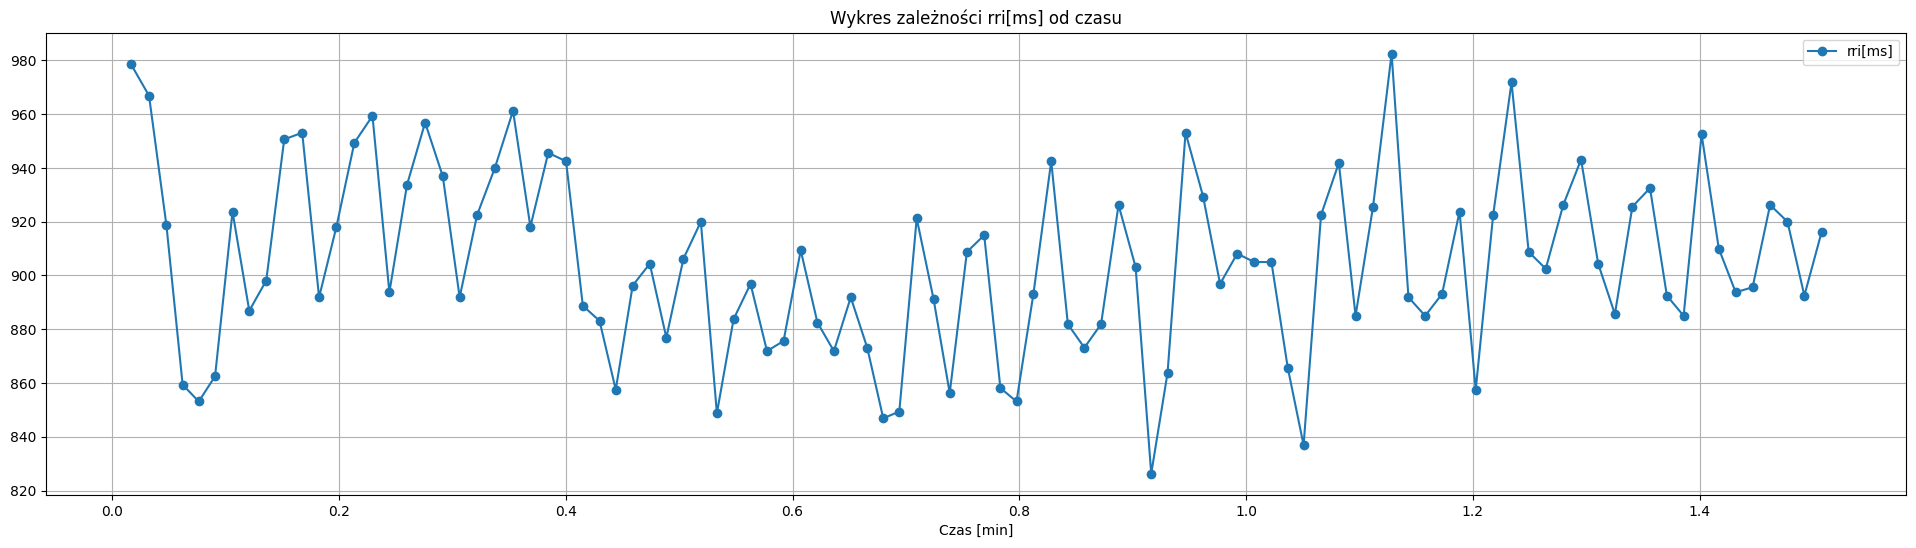

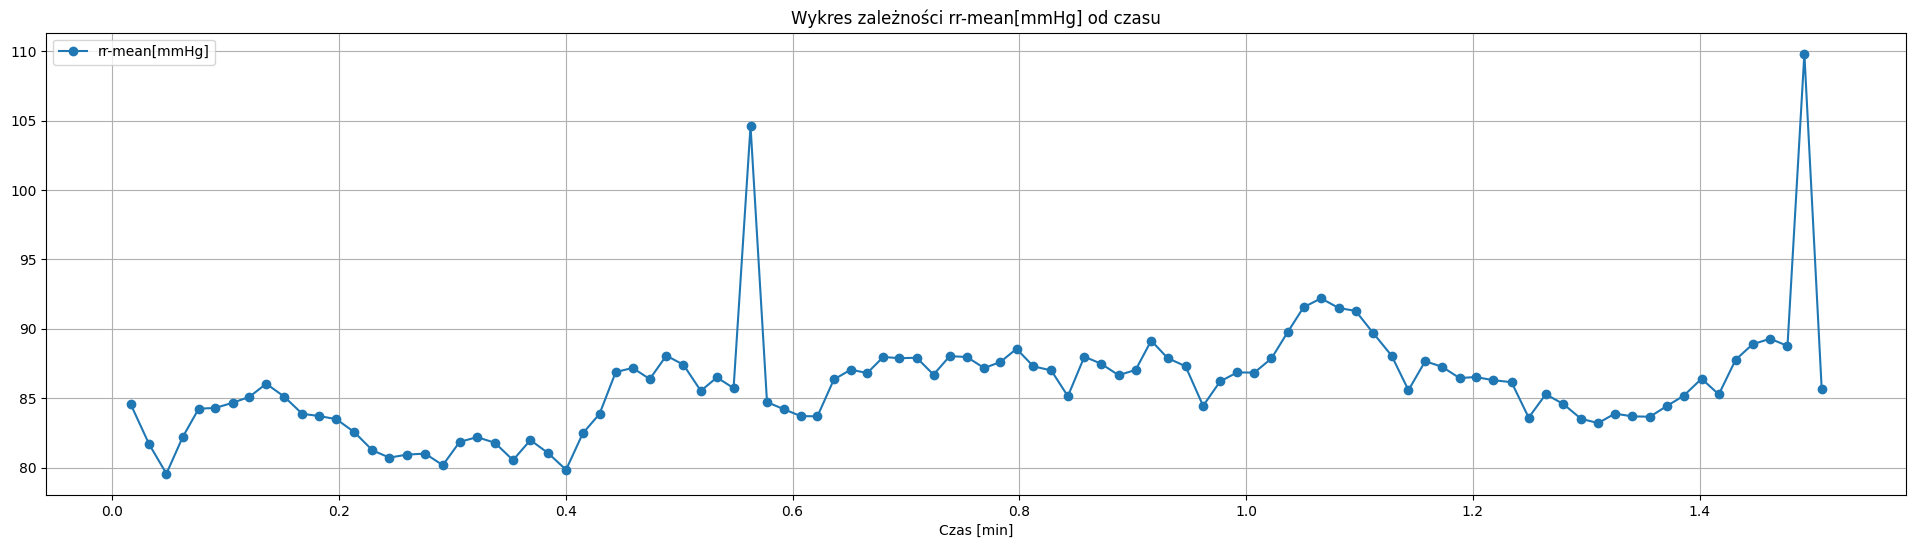

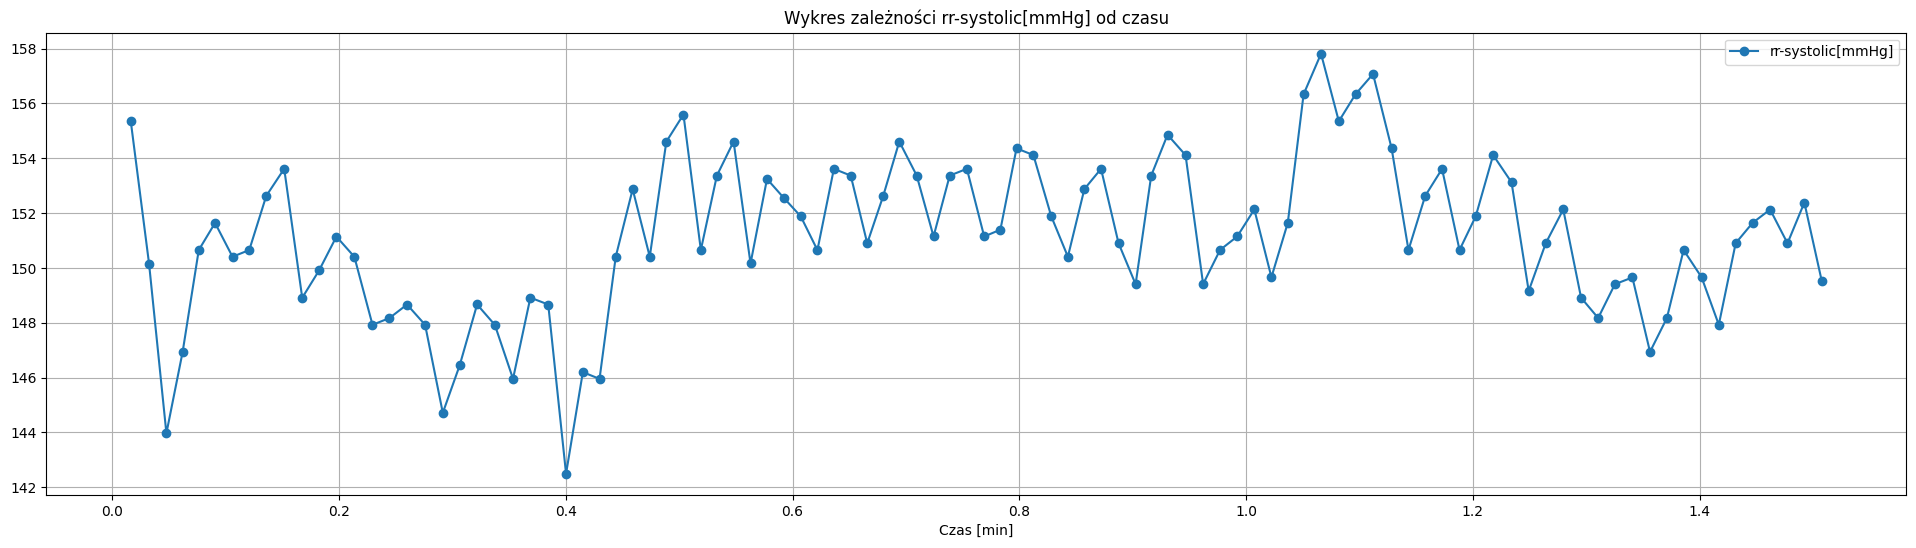

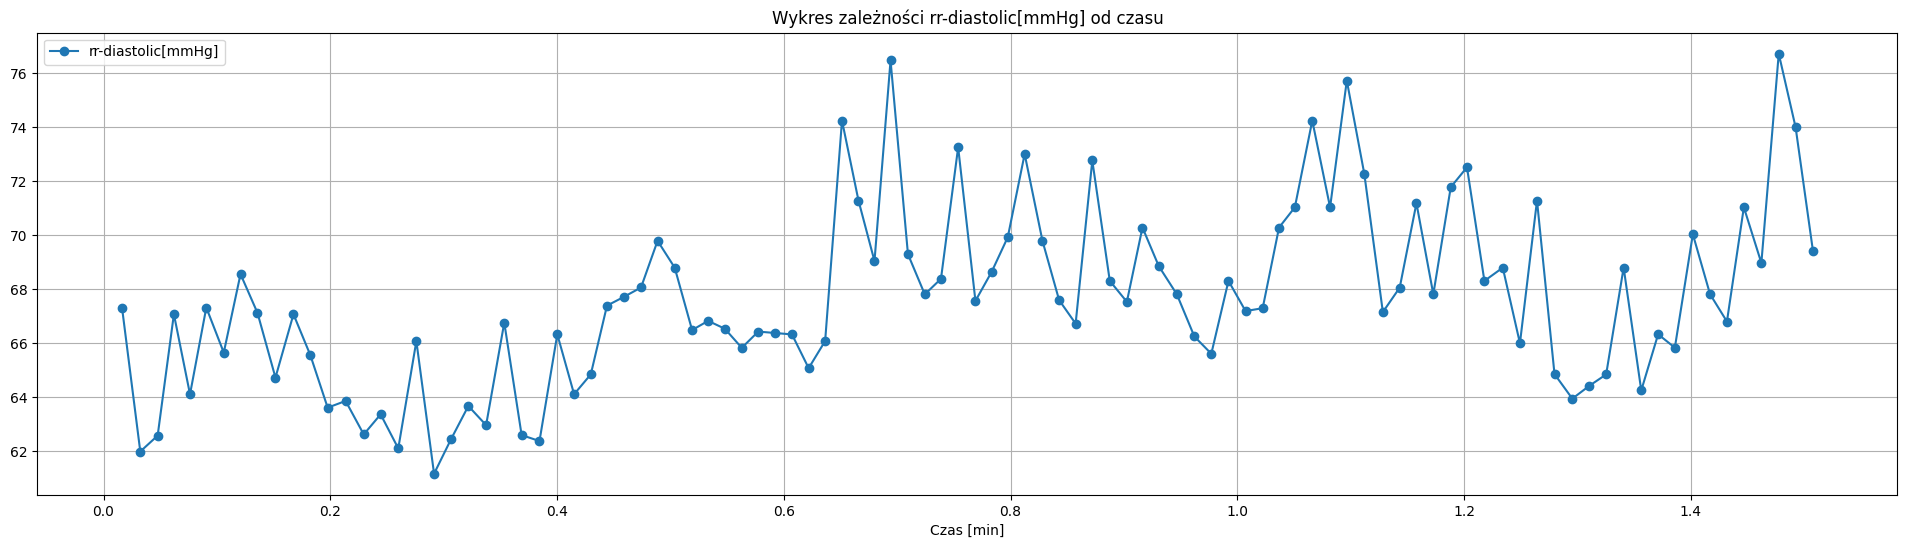

In [17]:
df_rea = pd.read_csv('HYPOL RECORDINGS/ag016.rea', delimiter='\t', header=0)
df_rea = df_rea.head(100)
print(df_rea.head())



plt.figure(figsize=(24, 6))
plt.plot(df_rea['time[min]'], df_rea[['rri[ms]']], marker='o', linestyle='-')
plt.title('Wykres zależności rri[ms] od czasu')
plt.xlabel('Czas [min]')
plt.grid(True)
plt.legend(['rri[ms]'])
plt.show()

plt.figure(figsize=(24, 6))
plt.plot(df_rea['time[min]'], df_rea[['rr-mean[mmHg]']], marker='o', linestyle='-')
plt.title('Wykres zależności rr-mean[mmHg] od czasu')
plt.xlabel('Czas [min]')
plt.grid(True)
plt.legend(['rr-mean[mmHg]'])
plt.show()

plt.figure(figsize=(24, 6))
plt.plot(df_rea['time[min]'], df_rea[ColNames.rr_systolic_mmHg], marker='o', linestyle='-')
plt.title(f'Wykres zależności {ColNames.rr_systolic_mmHg} od czasu')
plt.xlabel('Czas [min]')
plt.grid(True)
plt.legend([ColNames.rr_systolic_mmHg])
plt.show()

plt.figure(figsize=(24, 6))
plt.plot(df_rea['time[min]'], df_rea[ColNames.rr_diastolic_mmHg], marker='o', linestyle='-')
plt.title(f'Wykres zależności {ColNames.rr_diastolic_mmHg} od czasu')
plt.xlabel('Czas [min]')
plt.grid(True)
plt.legend([ColNames.rr_diastolic_mmHg])
plt.show()

In [61]:
ekg_dict_1000 = limit_row(ekg_dict, 600)
merged_dict = merge_v1(ekg_dict_1000, df_main, ColNames.sex)
for val in merged_dict.values():
    val.ValueToVector()

In [65]:
datas: List[MyData] = list(merged_dict.values())
targets = np.array([data.target for data in datas])
values = np.vstack([data.value for data in datas])
train_targets, test_targets, train_values, test_values = train_test_split(targets, values, test_size=0.1, random_state=42, stratify=targets)

In [66]:
X_train = train_values  # wartości z danych treningowych
y_train = train_targets  # etykiety z danych treningowych

# Dane testowe
X_test = test_values  # wartości z danych testowych
y_test = test_targets  # etykiety z danych testowych

# Inicjalizacja klasyfikatora SVM
clf = svm.SVC(kernel='linear')

# Trenowanie modelu na danych treningowych
clf.fit(X_train, y_train)

# Testowanie modelu na danych testowych
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# Obliczenie dokładności modelu
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Dokładność modelu SVM: {:.2f}%".format(train_accuracy * 100))
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność modelu SVM: {:.2f}%".format(accuracy * 100))

Train Dokładność modelu SVM: 100.00%
Dokładność modelu SVM: 75.00%


In [46]:

train_values[2].shape


(7000,)